In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install seaborn
from Utilities import *

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/storage/software/easybuild/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")
df_data = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
print(df.keys())

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr'],
      dtype='object')


In [3]:
otherCategories = [ 'topX', 'Higgs']

for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

df_weight = df.weight

In [4]:
#cats = ['Other' ,'Diboson' , 'ttbar', 'Zjets','topX', 'SUSYSlepSlep']
cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'SUSYSlepSlep','Other']

In [5]:
df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
df_mt2 = []
df_bTag = []
df_njet20 = []
df_njet60 = []
df_isOS = []
nr_events_BC = []
weights = []

for i in range(len(cats)):
    index = df["category"] == cats[i]
    df_cat = df[index]
    weights.append(df_weight[index])
    df_pt1.append(df_cat["lep1_pt"].ravel()/1000)
    df_pt2.append(df_cat["lep2_pt"].ravel()/1000)
    df_mep.append(df_cat["met_et"].ravel()/1000)
    df_mll.append(df_cat["mll"].ravel()/1000)
    df_mt2.append(df_cat["mt2"].ravel()/1000)
    df_bTag.append(df_cat["nbjet77"].ravel())
    df_njet20.append(df_cat["njet20"].ravel())
    df_njet60.append(df_cat["njet60"].ravel())
    df_isOS.append(df_cat["isOS"].ravel())
    nr_events_BC.append(np.sum(weights[i].array))
    
    print(f"Nr of {cats[i]} events: {int(nr_events_BC[i])}")


sort_indx = sorted(range(len(nr_events_BC)), key=lambda k: nr_events_BC[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
df_mt2 = [df_mt2[i] for i in sort_indx]
df_bTag = [df_bTag[i] for i in sort_indx]
df_njet20 = [df_njet20[i] for i in sort_indx]
df_njet60 = [df_njet60[i] for i in sort_indx]
df_isOS = [df_isOS[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]


Nr of Wjets events: 302422
Nr of singleTop events: 21678
Nr of Diboson events: 45123
Nr of ttbar events: 210407
Nr of Zjets events: 10160023
Nr of SUSYSlepSlep events: 8831
Nr of Other events: 46140


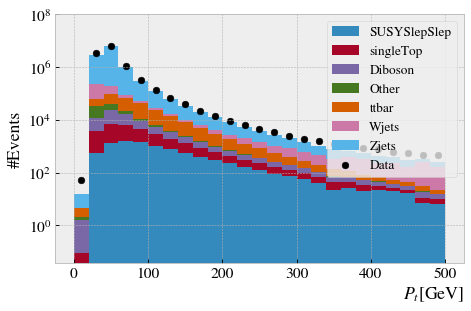

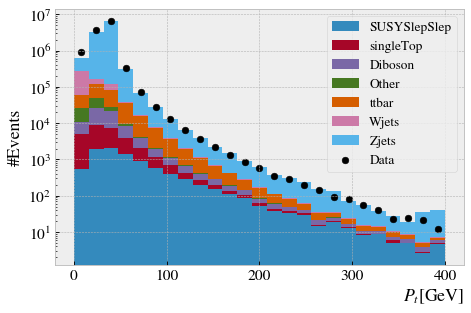

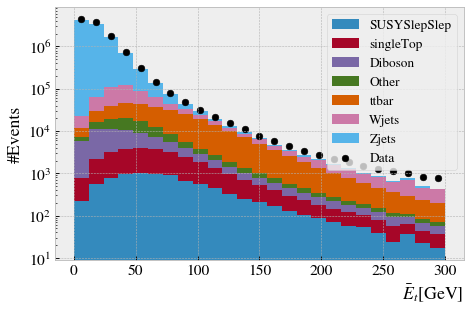

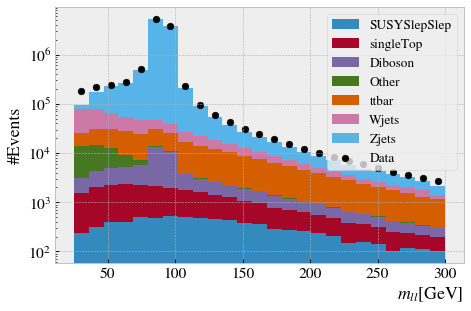

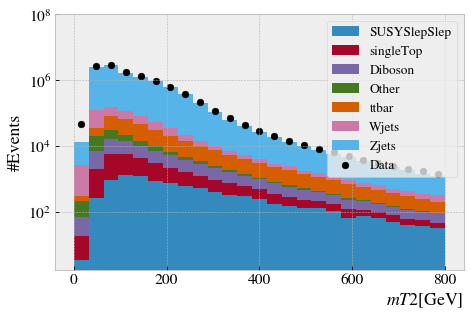

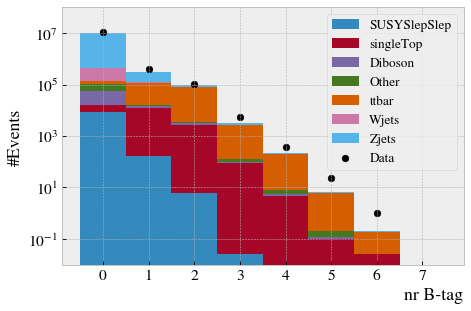

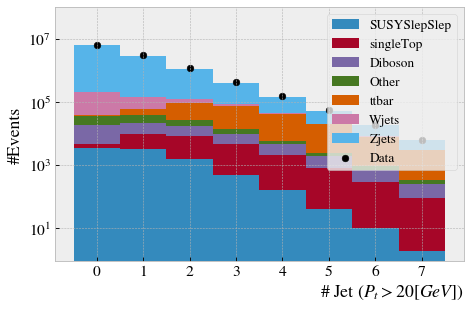

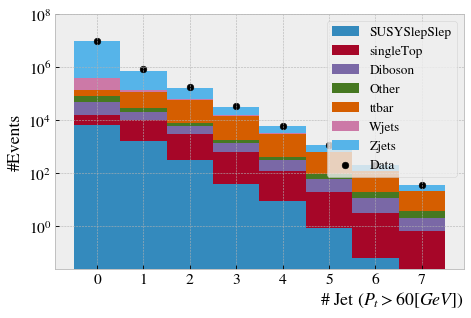

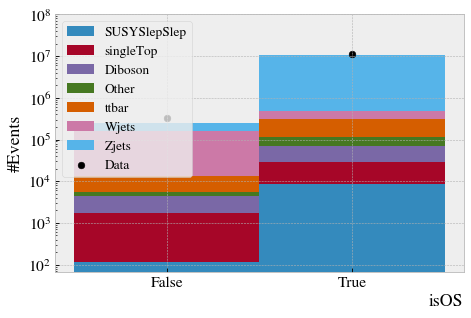

In [6]:
N, bins = np.histogram(df_data["lep1_pt"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig = plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.hist(df_pt1, weights = weights, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
ax.set_ylim(top = 1e8)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t1.pdf")
plt.show()


N, bins = np.histogram(df_data["lep2_pt"]/1000, bins = 25, range=(0,400))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_pt2, weights = weights, bins = 25, range=(0,400), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t2.pdf")
plt.show()

N, bins = np.histogram(df_data["met_et"]/1000, bins = 25, range=(0,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mep, weights = weights, bins = 25, range=(0,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/MET.pdf")
plt.show()

N, bins = np.histogram(df_data["mll"]/1000, bins = 25, range=(25,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mll, weights = weights, bins = 25, range=(25,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mll.pdf")
plt.show()

N, bins = np.histogram(df_data["mt2"]/1000, bins = 25, range=(0,800))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m{T2}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mt2, weights = weights, bins = 25, range=(0,800), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/mT2.pdf")
plt.show()

N, bins = np.histogram(df_data["nbjet77"], np.arange(9)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xticks(np.arange(9)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(9)])
plt.xlabel(r"nr B-tag", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_bTag, weights = weights, bins = np.arange(9)-0.5+(bins[0]+bins[1])/2, stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/bTag.pdf")
plt.show()


N, bins = np.histogram(df_data["njet20"], np.arange(9)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xticks(np.arange(9)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(9)])
plt.xlabel(r"# Jet $(P_t>20[GeV])$", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_njet20, weights = weights, bins = np.arange(9)-0.5+(bins[0]+bins[1])/2, stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/njet20.pdf")
plt.show()

N, bins = np.histogram(df_data["njet60"], np.arange(9)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xticks(np.arange(9)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(9)])
plt.xlabel(r"# Jet $(P_t>60[GeV])$", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_njet60, weights = weights, bins = np.arange(9)-0.5+(bins[0]+bins[1])/2, stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/njet60.pdf")
plt.show()



N, bins = np.histogram(df_data["isOS"], bins = 2, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.xticks([0.25, 0.75], labels = ["False","True"])
plt.yscale("log")
plt.xlabel(r"isOS", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_isOS, weights = weights, bins = 2, range=(0,1), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/isOS.pdf")
plt.show()


In [7]:
import pickle
xgb = pickle.load(open("XGBoost_trained", "rb"))

## Cuts signal region

In [8]:
#Count number of SUSY before cuts
SUSY_index = df["category"] == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df["physdescr"][SUSY_index].unique()
SUSY_nr_events_BC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_BC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)

In [9]:
df = df[((abs(df["mll"])>120*1000) & (df["nbjet77"] <= 1) & (df["isOS"] == 1) & (df["mt2"] > 175*1000) & (df["met_et"] > 50*1000) & (df["lep1_pt"] > 80*1000) & (df["lep2_pt"] > 25*1000) )]
df_data = df_data[((abs(df_data["mll"])>120*1000)   & (df_data["nbjet77"] <= 1) & (df_data["isOS"] == 1) & (df_data["mt2"] > 175*1000) & (df_data["met_et"] > 50*1000) & (df_data["lep1_pt"] > 80*1000) & (df_data["lep2_pt"] > 25*1000) )]

SUSY_index = df["category"] == "SUSYSlepSlep"
df_category = df.category
df_weights = df.weight
df_physdescr = df.physdescr

SUSY_nr_events_AVC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_AVC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)


for i in range(len(cats)):
    print(f"Nr of {cats[i]} events: {int(np.sum(df_weights[df_category == cats[i]].array))}")

Nr of SUSYSlepSlep events: 2457
Nr of singleTop events: 1648
Nr of Diboson events: 1565
Nr of Other events: 65
Nr of ttbar events: 11192
Nr of Wjets events: 5653
Nr of Zjets events: 2131


In [10]:
df.drop(['category', 'channelNumber', 'physdescr', 'weight'],axis=1,inplace=True)
df_data.drop(['channelNumber',  'weight'],axis=1,inplace=True)

In [11]:
df_output = []
weights = []
nr_events_AC = []

cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'Other']

for i in range(len(cats)):
    index = df_category == cats[i]
    X_cat = np.array(df[index])
    weights.append(df_weights[index])
    df_output.append(xgb.predict_proba(X_cat)[:,1])
    nr_events_AC.append(np.sum(weights[i].array))


    
SUSY_output = xgb.predict_proba(np.array(df[SUSY_index]))[:,1]
SUSY_weights = df_weights[SUSY_index]

sort_indx = sorted(range(len(nr_events_AC)), key=lambda k: nr_events_AC[k])

df_output = [df_output[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
nr_events_AC = [nr_events_AC[i] for i in sort_indx]

for i in range(len(cats)):
    print(cats[i], int(nr_events_AC[i]))

Other 65
Diboson 1565
singleTop 1648
Zjets 2131
Wjets 5653
ttbar 11192


In [35]:
xbg_pred_data = xgb.predict_proba(np.array(df_data))[:,1]
N, bins = np.histogram(xbg_pred_data, bins = 25, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
threshold = 0.875

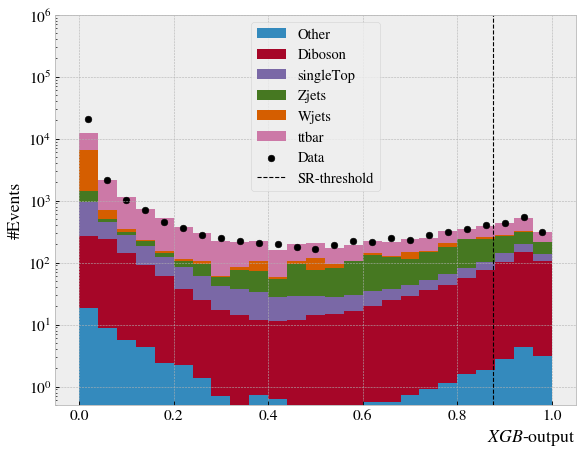

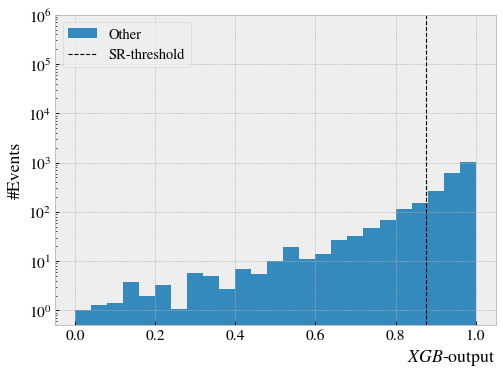

In [36]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([5e-1,1e6])
plt.hist(df_output[:], weights = weights[:], bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats, zorder=0)
plt.scatter(x, N, c = "black", label = "Data")
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0, label = "SR-threshold")
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_dist.pdf")
plt.show()




fig = plt.figure(figsize = (6.4, 4.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([5e-1,1e6])
plt.hist(SUSY_output, weights = SUSY_weights, bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats, zorder=0)
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0, label = "SR-threshold")
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_SUSY.pdf")
plt.show()

## Compare events in the signal region

In [63]:
n_obs_ML = np.sum(np.array(xbg_pred_data>threshold))
n_obs_nML = len(xbg_pred_data)

bkg_ML = 0
bkg_nML = 0
bkg_expt = 0

nr_events_AMLC = [np.sum(SUSY_weights[SUSY_output>threshold])]
print('SUSYSlepSlep',int(nr_events_AMLC[0]))
for i in range(len(df_output)):
    chan_bkg = np.sum(weights[i][df_output[i]>threshold])
    nr_events_AMLC.append(chan_bkg)
    if cats[i] != 'SUSYSlepSlep':
        bkg_ML += chan_bkg
        bkg_nML += np.sum(weights[i])
    print(cats[i], int(chan_bkg))
print(" ")
print(f"--- SR analysis with ML ---")
print(f"n_obs: {n_obs_ML} --- ML: bkg: {int(bkg_ML)} ")
print(f"n_obs - bkg = {int(n_obs_ML-bkg_ML)}")
print("")
print(f"--- SR analysis without ML ---")
print(f"n_obs: {n_obs_nML} --- ML: bkg: {int(bkg_nML)} ")
print(f"n_obs - bkg = {int(n_obs_nML-bkg_nML)}")

SUSYSlepSlep 1952
Other 10
Diboson 359
singleTop 126
Zjets 313
Wjets 45
ttbar 463
 
--- SR analysis with ML ---
n_obs: 1340 --- ML: bkg: 1318 
n_obs - bkg = 21

--- SR analysis without ML ---
n_obs: 30558 --- ML: bkg: 22256 
n_obs - bkg = 8301


In [64]:
SUSY_index = df_category == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df_physdescr[SUSY_index].unique()
SUSY_nr_events_AMLC = {}
CL_SB = []
effic_ML = {}
effic_nML = {}

In [65]:
for i in range(len(SUSY_masses)):
    mass_index = df_physdescr == SUSY_masses[i]
    X_mass = df[mass_index]
    weight_mass = df_weights[mass_index].array
    pred = xgb.predict_proba(X_mass)[:,1]
    SUSY_nr_events_AMLC[SUSY_masses[i]] = np.sum(weight_mass[np.array(pred>threshold)])
    effic_ML[SUSY_masses[i]] = SUSY_nr_events_AMLC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    effic_nML[SUSY_masses[i]] = SUSY_nr_events_AVC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    print(f"{SUSY_masses[i]}: After Variable Cuts {int(SUSY_nr_events_AVC[SUSY_masses[i]])}, eff = {effic_nML[SUSY_masses[i]]:.2f}")
    print(f"{SUSY_masses[i]}: After ML Cuts {int(SUSY_nr_events_AMLC[SUSY_masses[i]])}, eff = {effic_ML[SUSY_masses[i]]:.2f}")

SlepSlep_direct_200p5_1p0_2L8: After Variable Cuts 258, eff = 0.65
SlepSlep_direct_200p5_1p0_2L8: After ML Cuts 231, eff = 0.58
SlepSlep_direct_200p0_100p0_2L8: After Variable Cuts 186, eff = 0.51
SlepSlep_direct_200p0_100p0_2L8: After ML Cuts 159, eff = 0.43
SlepSlep_direct_500p5_1p0_2L8: After Variable Cuts 7, eff = 0.90
SlepSlep_direct_500p5_1p0_2L8: After ML Cuts 6, eff = 0.84
SlepSlep_direct_700p0_300p0_2L8: After Variable Cuts 1, eff = 0.91
SlepSlep_direct_700p0_300p0_2L8: After ML Cuts 1, eff = 0.86
SlepSlep_direct_600p0_300p0_2L8: After Variable Cuts 2, eff = 0.89
SlepSlep_direct_600p0_300p0_2L8: After ML Cuts 2, eff = 0.83
SlepSlep_direct_600p0_1p0_2L8: After Variable Cuts 2, eff = 0.92
SlepSlep_direct_600p0_1p0_2L8: After ML Cuts 2, eff = 0.87
SlepSlep_direct_700p0_1p0_2L8: After Variable Cuts 1, eff = 0.93
SlepSlep_direct_700p0_1p0_2L8: After ML Cuts 1, eff = 0.87
SlepSlep_direct_100p5_1p0_2L8: After Variable Cuts 1201, eff = 0.29
SlepSlep_direct_100p5_1p0_2L8: After ML Cuts

In [66]:
M = []
LM = []
NM = []
for i in range(len(SUSY_masses)):
    string = SUSY_masses[i].split("_")
    lm, nm = string[2].split("p")[0] + "." + string[2].split("p")[1]  , string[3].split("p")[0]
    LM.append(float(lm))
    NM.append(float(nm))
    #M.append("$m_{\tilde{l}}=$"+lm )
    M.append(f"{lm} -- {nm}")


sort_indx = sorted(range(len(LM)), key=lambda k: LM[k])

M = [M[i] for i in sort_indx]
effic_l1 = list(effic_ML.values())
effic_ML = [effic_l1[i] for i in sort_indx]
effic_l2 = list(effic_nML.values())
effic_nML = [effic_l2[i] for i in sort_indx]

print(effic_nML)
print(effic_ML)

[0.12894609366800525, 0.23066451708610594, 0.43407997998521247, 0.5832602496153141, 0.4722459349781998, 0.7312514846949233, 0.4815862840625538, 0.7455893493524562, 0.8253334703726546, 0.840116591368042, 0.8297881585713448, 0.8665948594557664, 0.8577012438327316, 0.8688592666566021]
[0.1795228829489311, 0.29090274502073526, 0.5064986683679301, 0.6502020281087784, 0.5453795114850785, 0.79823731282275, 0.5521628486821618, 0.8061592507683175, 0.891097094213316, 0.9003666131814874, 0.888645968288838, 0.9199803980767699, 0.9108526628955992, 0.9292922301793207]


## Result from statistical analysis with ML output

In [47]:
OLim = [123.79, 69.1, 36.77, 27.37, 33.8, 21.83, 33.15, 21.41, 19.31, 19.0, 19.21, 18.42, 18.61, 18.37]
OLim_1p5 = [97.84, 54.69, 29.06, 21.63, 26.71, 17.25, 26.2, 16.92, 15.29, 15.02, 15.2, 14.56, 14.71, 14.52]

nr_Events = np.around(np.array(SUSY_nr_events_AC))/10
OLim = np.array(OLim)

OLim = np.insert(OLim,0, OLim[0])
OLim_1p5 = np.insert(OLim_1p5,0, OLim_1p5[0])
OLim_1 = np.insert(OLim_1,0, OLim_1[0])
x = np.linspace(0.5,len(nr_Events)+0.5, len(OLim))
print(nr_Events)
print(OLim)

[48.1 95.3 16.  23.2  3.4  5.6  1.   0.6  0.6  0.7  0.2  0.3  0.1  0.1]
[123.79 123.79  69.1   36.77  27.37  33.8   21.83  33.15  21.41  19.31
  19.    19.21  18.42  18.61  18.37]


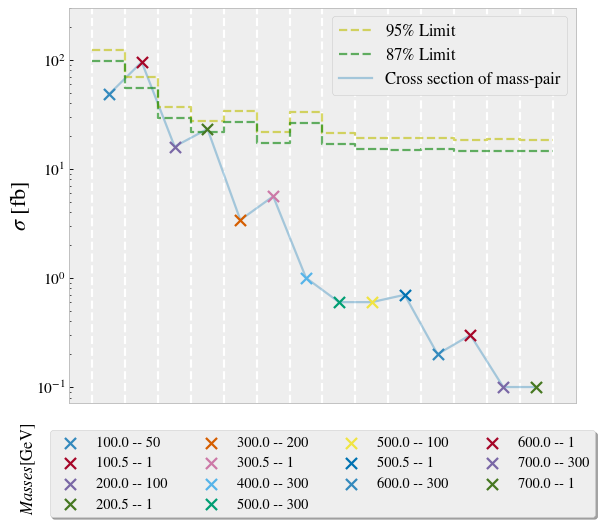

In [56]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(r"$\sigma$ [fb]", fontsize=20)
for i in range(len(nr_Events)): 
    ax.scatter(i+1, nr_Events[i], marker = "x", label = M[i], s = 100,zorder=i+10)
ax.set_yscale("log")
ax.set_ylim(top = 3e2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.figtext(0.04, -0.02, r"$Masses$[GeV]", rotation=90, va='center', fontsize = 15)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
legend1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4, fontsize=13)
plt.plot(x, OLim, "--",drawstyle='steps', c = 'y', alpha = 0.6, zorder=1)
plt.plot(x, OLim_1p5, "--",drawstyle='steps', c = 'g', alpha = 0.6)

plt.plot(range(1,len(nr_Events)+ 1), nr_Events, alpha = 0.4, zorder=0)
lines = ax.get_lines()
legend2 = plt.legend(lines, [r'$95\%$ Limit', r'$87\%$ Limit','Cross section of mass-pair' ], loc='upper right',fontsize=15, framealpha = 1)
ax.add_artist(legend1)
for xi in x:
    ax.axvline(xi, linestyle = "--", zorder=-1, alpha = 1, c = "white")
plt.grid(False)
plt.savefig("figures/ExlusionEvents.pdf")
plt.show()